In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pi = np.pi
exp = np.exp
log = np.log
sqrt = np.sqrt
sin = np.sin
cos = np.cos

In [2]:
from sympy import var, solve
a,b=var("a,b")
w0,w1,w2=var("w0,w1,w2")
eq1=w0+w1+w2
eq2=a*w0+(a+b)*w1/2+b*w2
eq3=a**2*w0+(a+b)**2*w1/4+b**2*w2
solve([eq1-b+a,eq2-b**2/2+a**2/2, eq3-b**3/3+a**3/3],[w0,w1,w2])

{w0: -a/6 + b/6, w1: -2*a/3 + 2*b/3, w2: -a/6 + b/6}

# 例1

In [3]:
from scipy import integrate
def f(x):
    return log(x)
v, err = integrate.quad(f, 1, 2)
print(v)
print(err)

0.38629436111989063
4.288728939981675e-15


In [4]:
trap=(2-1)/2*(f(1)+f(2))
print(trap)
c=1
errtrap=(2-1)**3*(-1/c**2)/12.0
print(np.abs(errtrap))

0.34657359027997264
0.08333333333333333


In [5]:
simp=(2-1)*(log(1)+4*log(1.5)+log(2))/6
print(simp)
c=1
errsimp=((2-1)/2)**5*(-6/c**4)/90
print(errsimp)

0.3858346021654338
-0.0020833333333333333


# 复合积分

In [6]:
def trapezoid_rule(f, a, b, m=1):
    x_range = np.linspace(a, b, m+1)
    y_range = f(x_range)
    h = (b - a)/m
    
    return (y_range[0] + y_range[-1] + 2*y_range[1:-1].sum())*h/2   

In [7]:
def simpson_rule(f, a, b, m=1):
    x_range = np.linspace(a, b, 2*m + 1)
    y_range = f(x_range)0
    h = (b - a)/(2*m)
    
    return (y_range[0] + y_range[-1] + 4*y_range[1::2].sum() + 2*y_range[2:-1:2].sum())*h/3

In [8]:
x=np.arange(10)
print(x)
print(x[1:])
print(x[1:-1:2])
print(x[2::2])

[0 1 2 3 4 5 6 7 8 9]
[1 2 3 4 5 6 7 8 9]
[1 3 5 7]
[2 4 6 8]


# 例2

In [9]:
from scipy import integrate
def f(x):
    return log(x)
v, err = integrate.quad(f, 1, 2)
print(v)
print(err)

0.38629436111989063
4.288728939981675e-15


In [10]:
def f(x):
    return log(x)
a=1
b=2
m=1
err=np.ones(16)
dm=np.ones(16)
intf = trapezoid_rule(f, a, b, m)
print(intf)
print(intf-v)
for i in range(9):
    print(i)
    m=10**i
    dm[i]=m
    intf = trapezoid_rule(f, a, b, m)
    err[i]=np.abs(intf-v)

0.34657359027997264
-0.039720770839917985
0
1
2
3
4
5
6
7
8


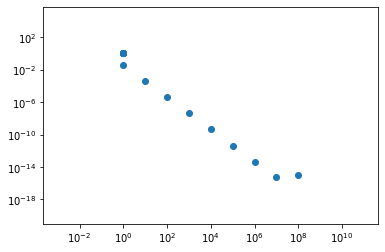

In [11]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(dm,err)

In [7]:
def f(x):
    return log(x)
a=1
b=2
m=4
intf = simpson_rule(f, a, b, m)
print(intf)
print(intf-v)
m=1
err=np.ones(10)
dm=np.ones(10)
intf = simpson_rule(f, a, b, m)
print(intf)
print(intf-v)
for i in range(9):
    print(i)
    m=10**i
    dm[i]=m
    intf = simpson_rule(f, a, b, m)
    err[i]=np.abs(intf-v)
for i in range(10):
    if err[i]==0:
        err[i]+=1.0*10**-16

0.3862920434663129
-2.3176535777214013e-06
0.3858346021654338
-0.0004597589544568237
0
1
2
3
4
5
6
7
8


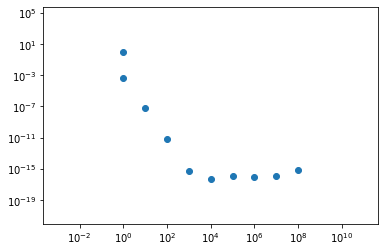

In [8]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(dm,err)

In [9]:
err

array([4.59758954e-04, 6.05255341e-08, 6.07613959e-12, 5.55111512e-16,
       5.55111512e-17, 1.11022302e-16, 1.00000000e-16, 1.11022302e-16,
       7.21644966e-16, 1.00000000e+00])

In [10]:
dm

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+00])

# 龙贝格

In [12]:
def romberg(f, a, b, n):
    h = b - a
    R = np.zeros((n, n))
    R[0, 0] = (f(a) + f(b))*h/2
    
    for j in range(1, n):
        h /= 2
        R[j, 0] = R[j-1, 0]/2 + sum([f(a + (2*k+1)*h) for k in range(2**(j-1))])*h
        for k in range(0, j):
            R[j, k+1] = ((4**(k+1)*R[j, k] - R[j-1, k])) / (4**(k+1) - 1)
    
    return R

# 例1

In [13]:
def trapezoid_rule(f, a, b, m=1):
    x_range = np.linspace(a, b, m+1)
    y_range = f(x_range)
    h = (b - a)/m
    
    return (y_range[0] + y_range[-1] + 2*y_range[1:-1].sum())*h/2  

In [14]:
def f(x):
    return np.cos(x)

In [15]:
for i in range(20):
    inttrap=trapezoid_rule(f,0,pi/2,2**(i))
    err=np.abs(inttrap-1)
    print(i,2**(i), inttrap,err)

0 1 0.7853981633974483 0.21460183660255172
1 2 0.9480594489685199 0.0519405510314801
2 4 0.9871158009727755 0.012884199027224486
3 8 0.9967851718861696 0.003214828113830448
4 16 0.9991966804850723 0.0008033195149277361
5 32 0.9997991943200185 0.00020080567998148613
6 64 0.9999498000921012 5.01999078987847e-05
7 128 0.9999874501175261 1.2549882473900098e-05
8 256 0.9999968625352877 3.137464712255067e-06
9 512 0.999999215634191 7.843658089701222e-07
10 1024 0.9999998039085708 1.960914292054028e-07
11 2048 0.9999999509771441 4.902285588581634e-08
12 4096 0.9999999877442862 1.2255713777165056e-08
13 8192 0.9999999969360717 3.0639283332689615e-09
14 16384 0.9999999992340178 7.659821665839672e-10
15 32768 0.9999999998085045 1.9149548613484058e-10
16 65536 0.9999999999521261 4.7873927044861375e-11
17 131072 0.9999999999880316 1.1968426250064113e-11
18 262144 0.999999999997008 2.992051051364797e-12
19 524288 0.9999999999992515 7.485123632022805e-13


In [20]:
1/(2**(10))**2

9.5367431640625e-07

In [21]:
for i in range(7):
    inttrap= romberg(f,0,pi/2,i+1)[-1,-1]
    err=np.abs(inttrap-1)
    print(i+1,i+1, inttrap,err)

1 1 0.7853981633974483 0.21460183660255172
2 2 1.0022798774922104 0.0022798774922103693
3 3 0.9999915654729927 8.434527007272763e-06
4 4 1.0000000081440208 8.144020791078788e-09
5 5 0.9999999999980169 1.9830803665854546e-12
6 6 1.0000000000000002 2.220446049250313e-16
7 7 1.0000000000000002 2.220446049250313e-16


# R22 h=1/2^2

In [32]:
(1/4)**2

0.0625

# 22->33 

In [34]:
(1/4)**4

0.00390625

In [35]:
(1/4)**6

0.000244140625

In [36]:
(1/4)**8

1.52587890625e-05